<a href="https://colab.research.google.com/github/softwarerbfl/imageProcessing/blob/main/Notebook-Week7/2022_1_ImgProc_Notebook_Lecture7_MO_CH5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

3-Mastering-OpenCV4 Source Code Notebook
- if you want to use the images from the textbook, copy the images from the source code folder to the ""Dongkeun-OpenCV-ImgData""

In [ ]:
from google.colab import drive 
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
%cd /gdrive/My Drive/Classroom/20-2-ImageProcessingClass/2020-2-ImgProcLec-Week7
%ls

/gdrive/My Drive/Classroom/20-2-ImageProcessingClass/2020-2-ImgProcLec-Week7
'2020-2 ImgProc Lecture 7 - HW 4-5 Solutions.mp4'
'2020-2 ImgProc MO4 - CH5.pptx'
 ImgProc-Notebook-Lecture7-MO-CH5.ipynb


#### Splitting and Merging 
- source code: splitting_and_merging.py



In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# matplot color display
def show_with_matplotlib(img, title):
    if img is None:
      print("show_with_matplotlib: Could not read the image.")
      return

    if img.shape[2] != 3:
      print()
      print("show_with_matplotlib: given image does not contains 3 channels")
      return

    # Convert BGR image to RGB:
    img_RGB = img[:, :, ::-1]

    # Show the image using matplotlib:
    plt.imshow(img_RGB)
    plt.title(title)
    plt.show()

# matplot grayscale display
def show_with_matplotlib_gray(img, title):
   if img is None:
      print("show_with_matplotlib_gray: Could not read the image.")
      return

   if img.ndim > 2:
      print()
      print("show_with_matplotlib: given image has more than 2 dim")
      return
      
   plt.imshow(img, cmap="gray")
   plt.title(title)
   plt.show()

def show_with_matplotlib_MO4(color_img, title, pos, axis_show):
    # Convert BGR image to RGB
    img_RGB = color_img[:, :, ::-1]

    ax = plt.subplot(3, 6, pos)
    plt.imshow(img_RGB)
    plt.title(title)

    if not axis_show:
      plt.axis('off')

    plt.show()

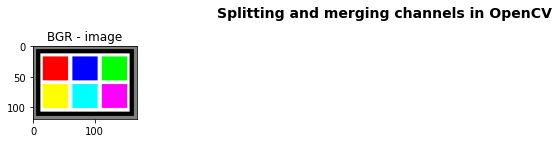

In [ ]:
# source code: splitting_and_merging.py

image_path = '../Dongkeun-OpenCV-ImgData/color_spaces.png'
image = cv2.imread(image_path)

# create a figure() object with appropriate size and title:
fsize =(13, 5)
plt.figure(figsize = fsize)
plt.suptitle("Splitting and merging channels in OpenCV", fontsize=14, fontweight='bold')

# Show the BGR image:
# change the signature for axis display
show_with_matplotlib_MO4(image, "BGR - image", 1, True)

shape of b =  (119, 169)
shape of g =  (119, 169)
shape of r =  (119, 169)
8 Region Colors
 Region (1,1) =>  [  0   0 255]
 Region (1,2) =>  [255   0   0]
 Region (1,3) =>  [  0 255   0]
 Region (2,1) =>  [  0 255 255]
 Region (2,2) =>  [255 255   0]
 Region (2,3) =>  [255   0 255]


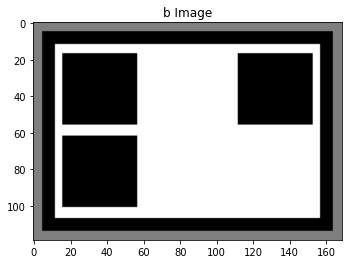

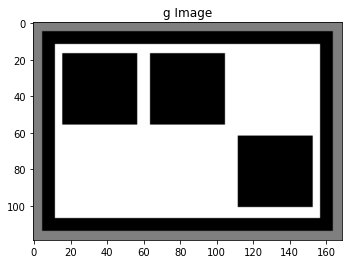

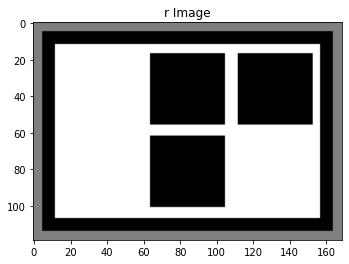

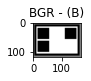

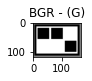

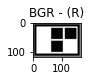

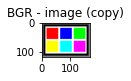

In [ ]:
# Split the image into its three components (blue, green and red):
(b, g, r) = cv2.split(image)

print("shape of b = ", b.shape)
print("shape of g = ", g.shape)
print("shape of r = ", r.shape)
print("8 Region Colors")
print(" Region (1,1) => ", image[20,40])
print(" Region (1,2) => ", image[20,80])
print(" Region (1,3) => ", image[20,140])
print(" Region (2,1) => ", image[80,40])
print(" Region (2,2) => ", image[80,80])
print(" Region (2,3) => ", image[80,140])

show_with_matplotlib_gray(b, "b Image")
show_with_matplotlib_gray(g, "g Image")
show_with_matplotlib_gray(r, "r Image")

# Show all the channels from the BGR image:
show_with_matplotlib_MO4(cv2.cvtColor(b, cv2.COLOR_GRAY2BGR), "BGR - (B)", 2, True)
show_with_matplotlib_MO4(cv2.cvtColor(g, cv2.COLOR_GRAY2BGR), "BGR - (G)", 2 + 6, True)
show_with_matplotlib_MO4(cv2.cvtColor(r, cv2.COLOR_GRAY2BGR), "BGR - (R)", 2 + 6 * 2, True)

# Merge the three channels again to build a BGR image:
image_copy = cv2.merge((b, g, r))

# Show the BGR image:
show_with_matplotlib_MO4(image_copy, "BGR - image (copy)", 1 + 6, True)

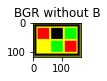

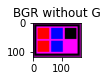

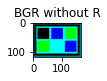

In [ ]:
# You should remember that cv2.split() is a time consuming operation
# Therefore, you should only use it if it is strictly necessary
# Otherwise, you can use numpy functionality to work with specific channels
# Another way of getting one component (in this case, the blue one)
# is using numpy idexing:
b_copy = image[:, :, 0]

# We make a copy of the loaded image:
image_without_blue = image.copy()

# From the BGR image, we "eliminate" (set to 0) the blue component (channel 0):
image_without_blue[:, :, 0] = 0

# From the BGR image, we "eliminate" (set to 0) the green component (channel 1):
image_without_green = image.copy()
image_without_green[:, :, 1] = 0

# From the BGR image, we "eliminate" (set to 0) the red component (channel 2):
image_without_red = image.copy()
image_without_red[:, :, 2] = 0

# Show all the channels from the BGR image:
show_with_matplotlib_MO4(image_without_blue, "BGR without B", 3, True)
show_with_matplotlib_MO4(image_without_green, "BGR without G", 3 + 6, True)
show_with_matplotlib_MO4(image_without_red, "BGR without R", 3 + 6 * 2, True)

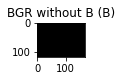

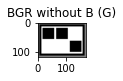

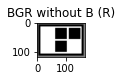

In [ ]:
# Split the 'image_without_blue' image into its three components (blue, green and red):
(b, g, r) = cv2.split(image_without_blue)

# Show all the channels from the BGR image without the blue information:
show_with_matplotlib_MO4(cv2.cvtColor(b, cv2.COLOR_GRAY2BGR), "BGR without B (B)", 4, True)
show_with_matplotlib_MO4(cv2.cvtColor(g, cv2.COLOR_GRAY2BGR), "BGR without B (G)", 4 + 6, True)
show_with_matplotlib_MO4(cv2.cvtColor(r, cv2.COLOR_GRAY2BGR), "BGR without B (R)", 4 + 6 * 2, True)

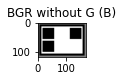

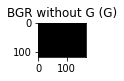

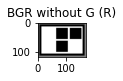

In [ ]:
# Split the 'image_without_green' image into its three components (blue, green and red):
(b, g, r) = cv2.split(image_without_green)

# Show all the channels from the BGR image without the green information:
show_with_matplotlib_MO4(cv2.cvtColor(b, cv2.COLOR_GRAY2BGR), "BGR without G (B)", 5, True)
show_with_matplotlib_MO4(cv2.cvtColor(g, cv2.COLOR_GRAY2BGR), "BGR without G (G)", 5 + 6, True)
show_with_matplotlib_MO4(cv2.cvtColor(r, cv2.COLOR_GRAY2BGR), "BGR without G (R)", 5 + 6 * 2, True)

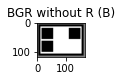

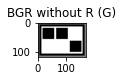

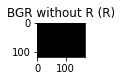

In [ ]:
# Split the 'image_without_red' image into its three components (blue, green and red):
(b, g, r) = cv2.split(image_without_red)

# Show all the channels from the BGR image without the red information:
show_with_matplotlib_MO4(cv2.cvtColor(b, cv2.COLOR_GRAY2BGR), "BGR without R (B)", 6, True)
show_with_matplotlib_MO4(cv2.cvtColor(g, cv2.COLOR_GRAY2BGR), "BGR without R (G)", 6 + 6, True)
show_with_matplotlib_MO4(cv2.cvtColor(r, cv2.COLOR_GRAY2BGR), "BGR without R (R)", 6 + 6 * 2, True)


#### Geometric Transformation of Image
- Source Code: geomertric_image_transformation.py

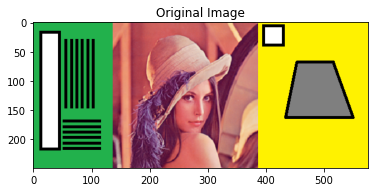

In [ ]:
image_path = '../Dongkeun-OpenCV-ImgData/lena_image.png'
image = cv2.imread(image_path)

show_with_matplotlib(image, "Original Image")

# 1. Scaling or resizing
# Resize the input image using cv2.resize()
# Resize using the scaling factor for each dimension of the image
# In this case the scaling factor is 0.5 in every dimension

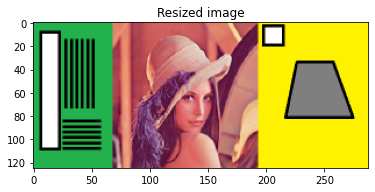

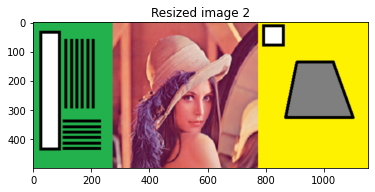

In [ ]:
dst_image = cv2.resize(image, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA)

# Get the height and width of the image:
height, width = image.shape[:2]

# You can resize also the image specifying the new size:
dst_image_2 = cv2.resize(image, (width * 2, height * 2), interpolation=cv2.INTER_LINEAR)

# We see the two resized images:
show_with_matplotlib(dst_image, 'Resized image')
show_with_matplotlib(dst_image_2, 'Resized image 2')

# 2. Translation
# You need to create the 2x3 transformation matrix making use of numpy array with float values (float32)
# Translation in the x direction: 200 pixels, and a translation in the y direction: 30 pixels:

M = np.float32([[1, 0, 200], [0, 1, 30]])

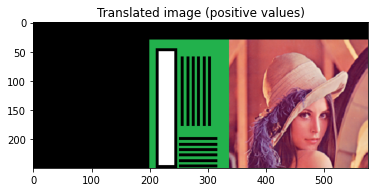

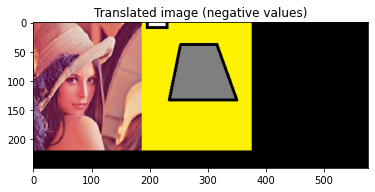

In [ ]:
M = np.float32([[1, 0, 200], [0, 1, 30]])

# Once this transformation Matrix is created, we can pass it to the function cv2.warpAffine():
dst_image = cv2.warpAffine(image, M, (width, height))

# Show the translated image:
show_with_matplotlib(dst_image, 'Translated image (positive values)')

# Additionally, the translation can take negative values:
M = np.float32([[1, 0, -200], [0, 1, -30]])
dst_image = cv2.warpAffine(image, M, (width, height))

# Show the translated image:
show_with_matplotlib(dst_image, 'Translated image (negative values)')

# 3. Rotation
# To rotate the image we make use of the function  cv.getRotationMatrix2D() to build the 2x3 rotation matrix:
# In this case, we are going to rotate the image 180 degrees (upside down):

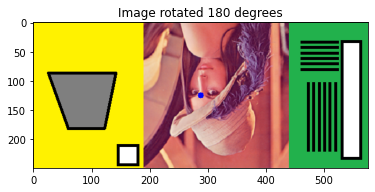

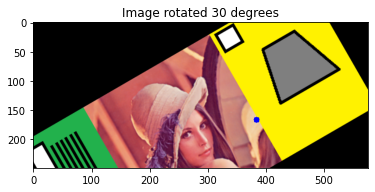

In [ ]:
M = cv2.getRotationMatrix2D((width / 2.0, height / 2.0), 180, 1)
dst_image = cv2.warpAffine(image, M, (width, height))

# Show the center of rotation and the rotated image:
cv2.circle(dst_image, (round(width / 2.0), round(height / 2.0)), 5, (255, 0, 0), -1)
show_with_matplotlib(dst_image, 'Image rotated 180 degrees')

# Now, we are going to rotate the image 30 degrees changing the center of rotation
M = cv2.getRotationMatrix2D((width / 1.5, height / 1.5), 30, 1)
dst_image = cv2.warpAffine(image, M, (width, height))

# Show the center of rotation and the rotated image:
cv2.circle(dst_image, (round(width / 1.5), round(height / 1.5)), 5, (255, 0, 0), -1)
show_with_matplotlib(dst_image, 'Image rotated 30 degrees')

# 4. Affine Transformation
# In an affine transformation we first make use of the function cv2.getAffineTransform()
# to build the 2x3 transformation matrix, which is obtained from the relation between three points
# from the input image and their corresponding coordinates in the transformed image.

# A copy of the image is created to show the points that will be used for the affine transformation:

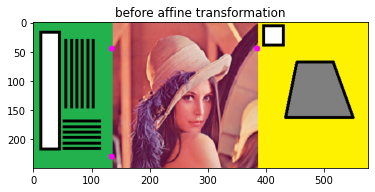

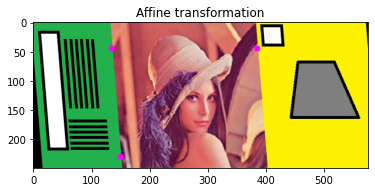

In [ ]:
image_points = image.copy()
cv2.circle(image_points, (135, 45), 5, (255, 0, 255), -1)
cv2.circle(image_points, (385, 45), 5, (255, 0, 255), -1)
cv2.circle(image_points, (135, 230), 5, (255, 0, 255), -1)

# Show the image with the three created points:
show_with_matplotlib(image_points, 'before affine transformation')

# We create the arrays with the aforementioned three points and the desired positions in the output image:
pts_1 = np.float32([[135, 45], [385, 45], [135, 230]])
pts_2 = np.float32([[135, 45], [385, 45], [150, 230]])

# We get the 2x3 tranformation matrix based on pts_1 and pts_2 and apply cv2.warpAffine():
M = cv2.getAffineTransform(pts_1, pts_2)
dst_image = cv2.warpAffine(image_points, M, (width, height))

# Show the image:
show_with_matplotlib(dst_image, 'Affine transformation')

# 5. Perspective transformation
# A copy of the image is created to show the points that will be used for the perspective transformation:

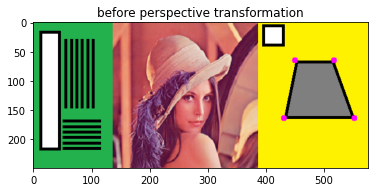

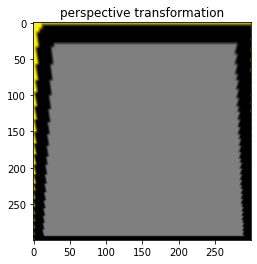

In [ ]:
image_points = image.copy()
cv2.circle(image_points, (450, 65), 5, (255, 0, 255), -1)
cv2.circle(image_points, (517, 65), 5, (255, 0, 255), -1)
cv2.circle(image_points, (431, 164), 5, (255, 0, 255), -1)
cv2.circle(image_points, (552, 164), 5, (255, 0, 255), -1)

# Show the image:
show_with_matplotlib(image_points, 'before perspective transformation')

# cv2.getPerspectiveTransform() needs four pairs of points
# (coordinates of a quadrangle in both the source and output image)
# We create the arrays for these four pairs of points:
pts_1 = np.float32([[450, 65], [517, 65], [431, 164], [552, 164]])
pts_2 = np.float32([[0, 0], [300, 0], [0, 300], [300, 300]])

# To correct the perspective (also known as perspective transformation) you need to create the transformation matrix
# making use of the function cv2.getPerspectiveTransform(), where a 3x3 matrix is constructed:
M = cv2.getPerspectiveTransform(pts_1, pts_2)

# Then, apply cv2.warpPerspective(), where the source image is transformed applying
# the specified matrix and with a specified size:
dst_image = cv2.warpPerspective(image, M, (300, 300))

# Show the image:
show_with_matplotlib(dst_image, 'perspective transformation')


# 6. Cropping
# A copy of the image is created to show the points that will be used for the cropping example:

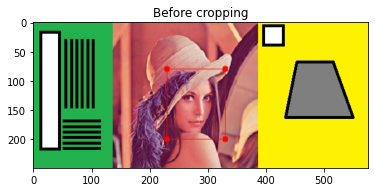

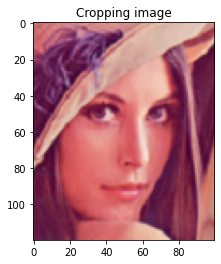

In [ ]:
image_points = image.copy()

# Show the points and lines connecting the points:
cv2.circle(image_points, (230, 80), 5, (0, 0, 255), -1)
cv2.circle(image_points, (330, 80), 5, (0, 0, 255), -1)
cv2.circle(image_points, (230, 200), 5, (0, 0, 255), -1)
cv2.circle(image_points, (330, 200), 5, (0, 0, 255), -1)
cv2.line(image_points, (230, 80), (330, 80), (0, 0, 255))
cv2.line(image_points, (230, 200), (330, 200), (0, 0, 255))
cv2.line(image_points, (230, 80), (230, 200), (0, 0, 255))
cv2.line(image_points, (330, 200), (330, 80), (0, 0, 255))

# Show the image with the points and lines:
show_with_matplotlib(image_points, 'Before cropping')

# For cropping, we make use of numpy slicing:
dst_image = image[80:200, 230:330]

# Show the image:
show_with_matplotlib(dst_image, 'Cropping image')

#### Saturation arithematic
Source Code: Saturation_arithmetic.py



In [ ]:
# There is a difference between OpenCV addition and Numpy addition.
# OpenCV addition is a saturated operation while Numpy addition is a modulo operation.
x = np.uint8([250])
y = np.uint8([50])

# OpenCV addition: values are clipped to ensure they never fall outside the range [0,255]
# 250+50 = 300 => 255:
result_opencv = cv2.add(x, y)
print("cv2.add(x:'{}' , y:'{}') = '{}'".format(x, y, result_opencv))

# NumPy addition: values wrap around
# 250+50 = 300 % 256 = 44:
result_numpy = x + y
print("x:'{}' + y:'{}' = '{}'".format(x, y, result_numpy))

cv2.add(x:'[250]' , y:'[50]') = '[[255]]'
x:'[250]' + y:'[50]' = '[44]'


### Image additon and subtraction
Source Code: arithmetic.py

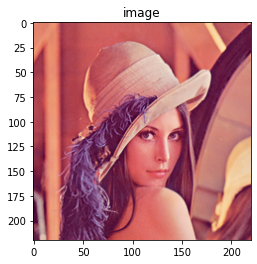

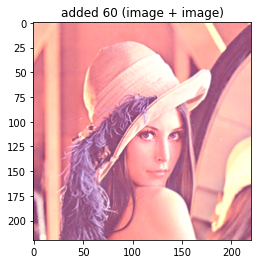

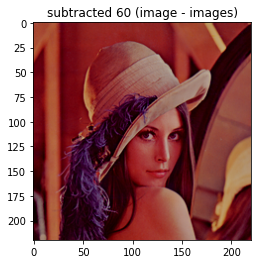

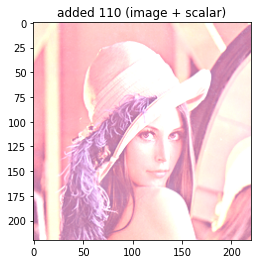

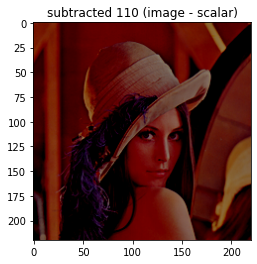

In [ ]:
# Load the original image:
image_path = '../Dongkeun-OpenCV-ImgData/Lena3.png'
new_image = cv2.imread(image_path)

# Add 60 to every pixel on the image. The result will look lighter:
M = np.ones(new_image.shape, dtype="uint8") * 60
added_image = cv2.add(new_image, M)

# Subtract 60 from every pixel. The result will look darker:
subtracted_image = cv2.subtract(new_image, M)

# Additionally, we can build an scalar and add/subtract it:
scalar = np.ones((1, 3), dtype="float") * 110
added_image_2 = cv2.add(new_image, scalar)
subtracted_image_2 = cv2.subtract(new_image, scalar)

# Display all the resulting images:
show_with_matplotlib(new_image, "image")
show_with_matplotlib(added_image, "added 60 (image + image)")
show_with_matplotlib(subtracted_image, "subtracted 60 (image - images)")
show_with_matplotlib(added_image_2, "added 110 (image + scalar)")
show_with_matplotlib(subtracted_image_2, "subtracted 110 (image - scalar)")

#### Image Blending
Source Code: arithmetic_sobel.py

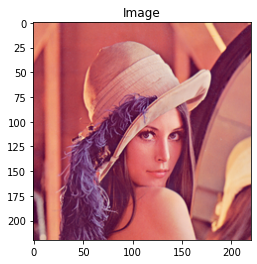

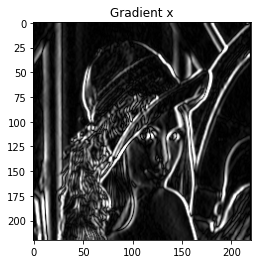

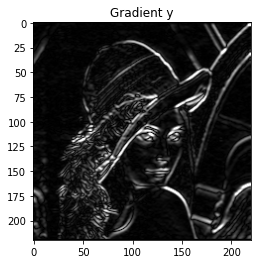

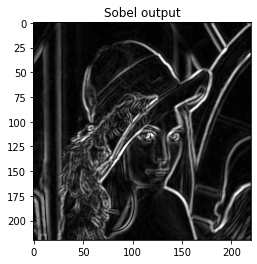

In [ ]:
# Load the original image:
image_path = '../Dongkeun-OpenCV-ImgData/Lena3.png'
image = cv2.imread(image_path)

# Filter the image with a gaussian kernel:
image_filtered = cv2.GaussianBlur(image, (3, 3), 0)

# We convert the image to grayscale:
gray_image = cv2.cvtColor(image_filtered, cv2.COLOR_BGR2GRAY)

# Gradient x is calculated:
# the depth of the output is set to CV_16S to avoid overflow
# CV_16S = one channel of 2-byte signed integers (16-bit signed integers)
gradient_x = cv2.Sobel(gray_image, cv2.CV_16S, 1, 0, 3)

# Gradient y is calculated:
# the depth of the output is set to CV_16S to avoid overflow
# CV_16S = one channel of 2-byte signed integers (16-bit signed integers)
gradient_y = cv2.Sobel(gray_image, cv2.CV_16S, 0, 1, 3)

# Conversion to an unsigned 8-bit type:
abs_gradient_x = cv2.convertScaleAbs(gradient_x)
abs_gradient_y = cv2.convertScaleAbs(gradient_y)

# Combine the two images using the same weight:
sobel_image = cv2.addWeighted(abs_gradient_x, 0.5, abs_gradient_y, 0.5, 0)

# Display all the resulting images:
show_with_matplotlib(image, "Image")
show_with_matplotlib(cv2.cvtColor(abs_gradient_x, cv2.COLOR_GRAY2BGR), "Gradient x")
show_with_matplotlib(cv2.cvtColor(abs_gradient_y, cv2.COLOR_GRAY2BGR), "Gradient y")
show_with_matplotlib(cv2.cvtColor(sobel_image, cv2.COLOR_GRAY2BGR), "Sobel output")

### Bitwise Operations
Source Code: bitwise_operations.py, bitwise_operations_images.py

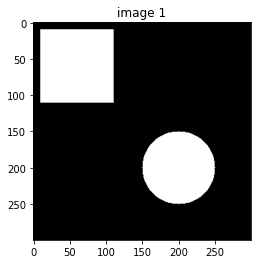

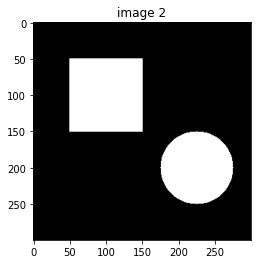

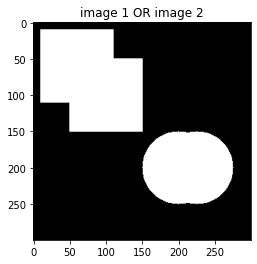

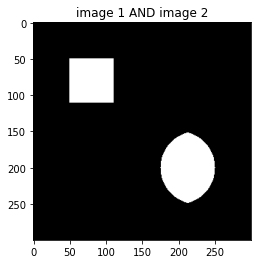

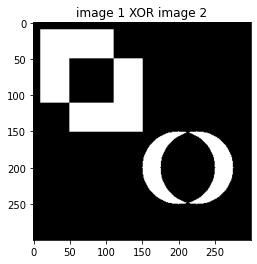

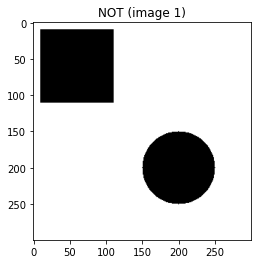

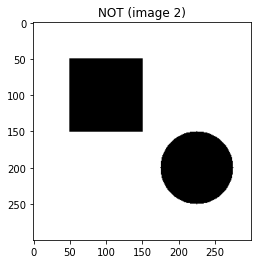

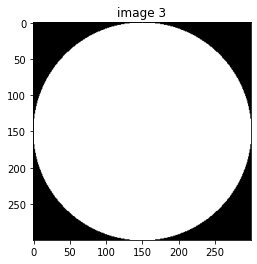

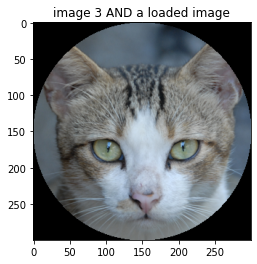

In [ ]:
# Create the dimensions of the figure and set title:

# Create the first image:
img_1 = np.zeros((300, 300), dtype="uint8")
cv2.rectangle(img_1, (10, 10), (110, 110), (255, 255, 255), -1)
cv2.circle(img_1, (200, 200), 50, (255, 255, 255), -1)

# Create the second image:
img_2 = np.zeros((300, 300), dtype="uint8")
cv2.rectangle(img_2, (50, 50), (150, 150), (255, 255, 255), -1)
cv2.circle(img_2, (225, 200), 50, (255, 255, 255), -1)

# Bitwise OR
bitwise_or = cv2.bitwise_or(img_1, img_2)

# Bitwise AND
bitwise_and = cv2.bitwise_and(img_1, img_2)

# Bitwise XOR
bitwise_xor = cv2.bitwise_xor(img_1, img_2)

# Bitwise NOT
bitwise_not_1 = cv2.bitwise_not(img_1)

# Bitwise NOT
bitwise_not_2 = cv2.bitwise_not(img_2)

# Display all the resulting images:
show_with_matplotlib(cv2.cvtColor(img_1, cv2.COLOR_GRAY2BGR), "image 1")
show_with_matplotlib(cv2.cvtColor(img_2, cv2.COLOR_GRAY2BGR), "image 2")
show_with_matplotlib(cv2.cvtColor(bitwise_or, cv2.COLOR_GRAY2BGR), "image 1 OR image 2")
show_with_matplotlib(cv2.cvtColor(bitwise_and, cv2.COLOR_GRAY2BGR), "image 1 AND image 2")
show_with_matplotlib(cv2.cvtColor(bitwise_xor, cv2.COLOR_GRAY2BGR), "image 1 XOR image 2")
show_with_matplotlib(cv2.cvtColor(bitwise_not_1, cv2.COLOR_GRAY2BGR), "NOT (image 1)")
show_with_matplotlib(cv2.cvtColor(bitwise_not_2, cv2.COLOR_GRAY2BGR), "NOT (image 2)")

# See how these operations can be used to work with images:
# Load the original image:
image = cv2.imread('../Dongkeun-OpenCV-ImgData/cat.png')

# Create the image to be used as mask:
img_3 = np.zeros((300, 300), dtype="uint8")
cv2.circle(img_3, (150, 150), 150, (255, 255, 255), -1)

# Bitwise AND using the img_3 as mask:
bitwise_and_example = cv2.bitwise_and(image, image, mask=img_3)

# Show these two images:
show_with_matplotlib(cv2.cvtColor(img_3, cv2.COLOR_GRAY2BGR), "image 3")
show_with_matplotlib(bitwise_and_example, "image 3 AND a loaded image")

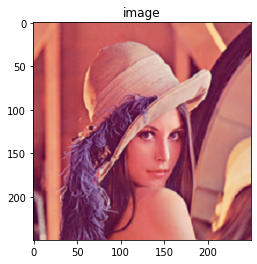

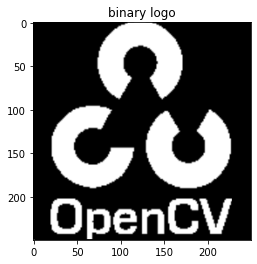

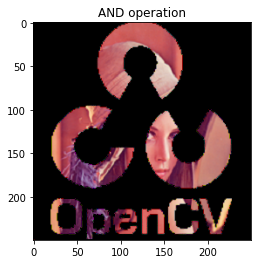

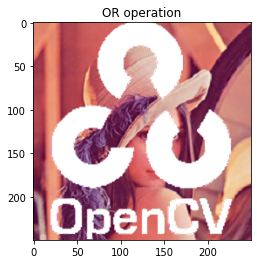

In [ ]:
# Load the original image (250x250):
image_path = '../Dongkeun-OpenCV-ImgData/lenna_250.png'
image = cv2.imread(image_path)

# Load the binary image (but as a GBR color image - with 3 channels) (250x250):
binary_image = cv2.imread('../Dongkeun-OpenCV-ImgData/opencv_binary_logo_250.png')

# Bitwise AND
bitwise_and = cv2.bitwise_and(image, binary_image)

# Bitwise OR
bitwise_or = cv2.bitwise_or(image, binary_image)

# Display all the resulting images:
show_with_matplotlib(image, "image")
show_with_matplotlib(binary_image, "binary logo")
show_with_matplotlib(bitwise_and, "AND operation")
show_with_matplotlib(bitwise_or, "OR operation")

#### Color Space
Source Code: color_space.py



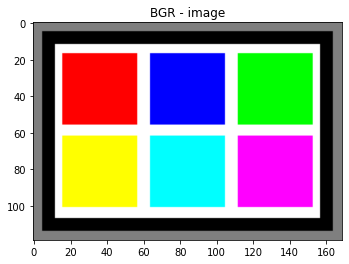

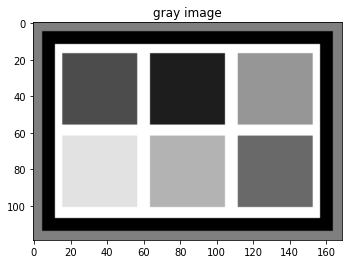

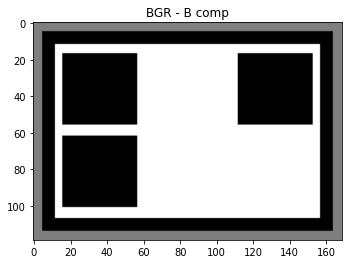

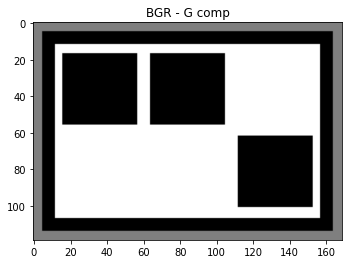

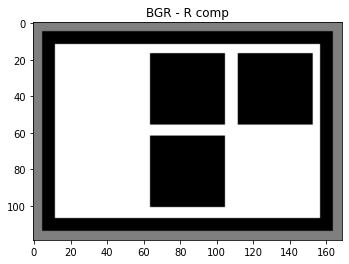

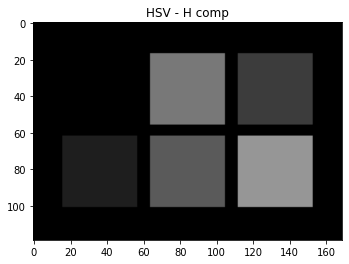

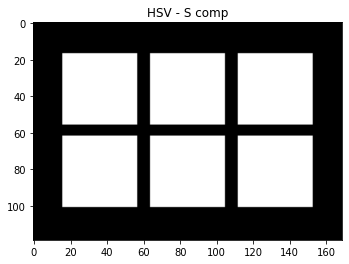

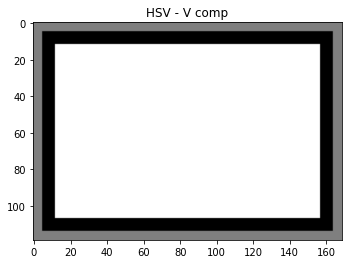

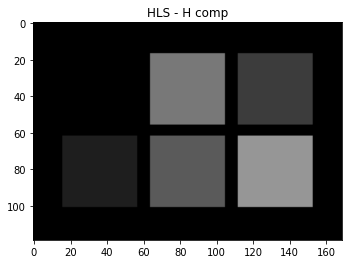

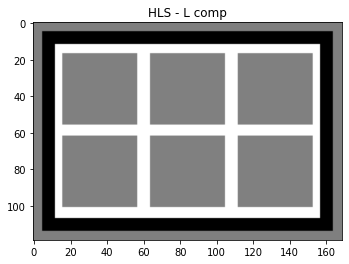

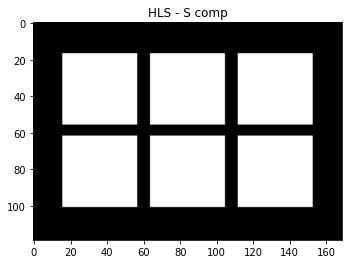

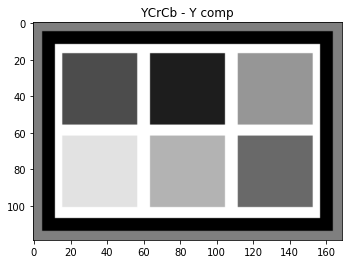

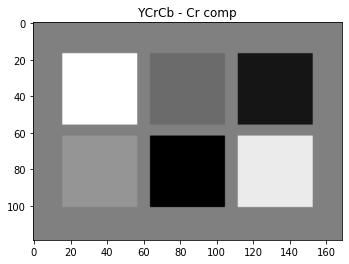

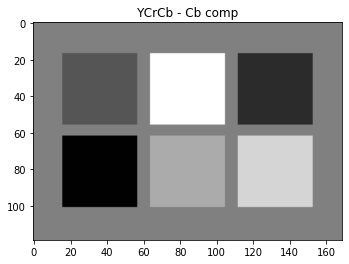

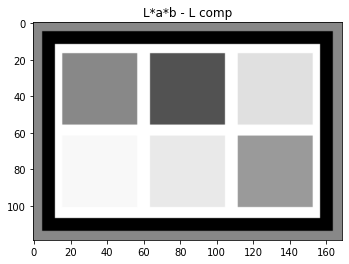

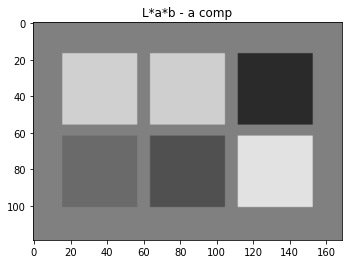

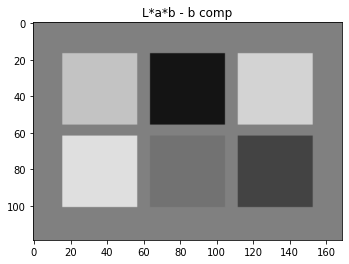

In [ ]:

image = cv2.imread('../Dongkeun-OpenCV-ImgData/color_spaces.png')

# Convert to grayscale:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Get the b, g, and r components from the loaded image:
(bgr_b, bgr_g, bgr_r) = cv2.split(image)

# Convert to HSV and get the components:
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
(hsv_h, hsv_s, hsv_v) = cv2.split(hsv_image)

# Convert to HLS and get the components:
hls_image = cv2.cvtColor(image, cv2.COLOR_BGR2HLS)
(hls_h, hls_l, hls_s) = cv2.split(hls_image)

# Convert to YCrCb and get the components:
ycrcb_image = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb)
(ycrcb_y, ycrcb_cr, ycrcb_cb) = cv2.split(ycrcb_image)

# Convert to L*a*b and get the components:
lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
(lab_l, lab_a, lab_b) = cv2.split(lab_image)

# Show all the created components:
show_with_matplotlib(image, "BGR - image")

# Show gray image:
show_with_matplotlib(cv2.cvtColor(gray_image, cv2.COLOR_GRAY2BGR), "gray image")

# Show bgr components:
show_with_matplotlib(cv2.cvtColor(bgr_b, cv2.COLOR_GRAY2BGR), "BGR - B comp")
show_with_matplotlib(cv2.cvtColor(bgr_g, cv2.COLOR_GRAY2BGR), "BGR - G comp")
show_with_matplotlib(cv2.cvtColor(bgr_r, cv2.COLOR_GRAY2BGR), "BGR - R comp")

# Show hsv components:
show_with_matplotlib(cv2.cvtColor(hsv_h, cv2.COLOR_GRAY2BGR), "HSV - H comp")
show_with_matplotlib(cv2.cvtColor(hsv_s, cv2.COLOR_GRAY2BGR), "HSV - S comp")
show_with_matplotlib(cv2.cvtColor(hsv_v, cv2.COLOR_GRAY2BGR), "HSV - V comp")

# Show hls components:
show_with_matplotlib(cv2.cvtColor(hls_h, cv2.COLOR_GRAY2BGR), "HLS - H comp")
show_with_matplotlib(cv2.cvtColor(hls_l, cv2.COLOR_GRAY2BGR), "HLS - L comp")
show_with_matplotlib(cv2.cvtColor(hls_s, cv2.COLOR_GRAY2BGR), "HLS - S comp")

# Show ycrcb components:
show_with_matplotlib(cv2.cvtColor(ycrcb_y, cv2.COLOR_GRAY2BGR), "YCrCb - Y comp")
show_with_matplotlib(cv2.cvtColor(ycrcb_cr, cv2.COLOR_GRAY2BGR), "YCrCb - Cr comp")
show_with_matplotlib(cv2.cvtColor(ycrcb_cb, cv2.COLOR_GRAY2BGR), "YCrCb - Cb comp")

# Show lab components:
show_with_matplotlib(cv2.cvtColor(lab_l, cv2.COLOR_GRAY2BGR), "L*a*b - L comp")
show_with_matplotlib(cv2.cvtColor(lab_a, cv2.COLOR_GRAY2BGR), "L*a*b - a comp")
show_with_matplotlib(cv2.cvtColor(lab_b, cv2.COLOR_GRAY2BGR), "L*a*b - b comp")

#### Skin segmentation in differnt color space 
Source Code: skin_segmentation.py

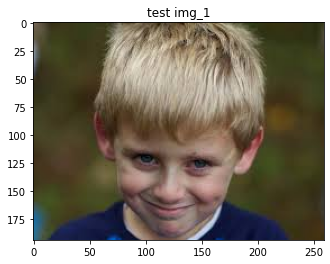

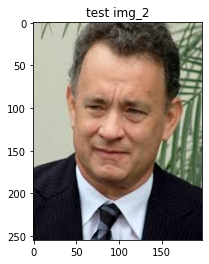

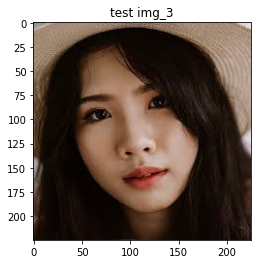

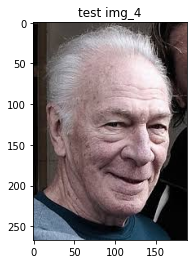

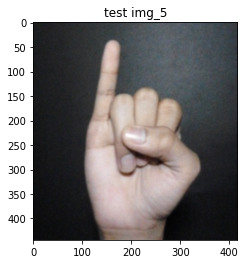

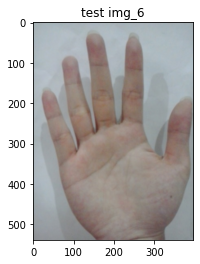

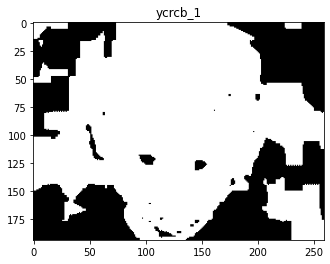

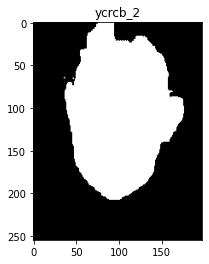

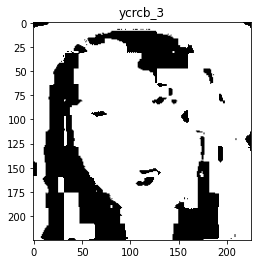

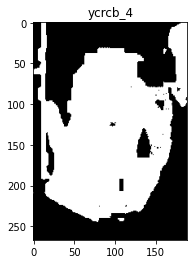

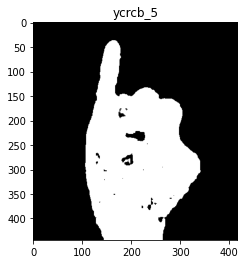

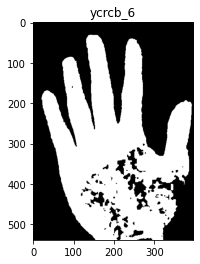

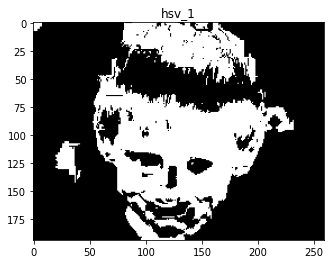

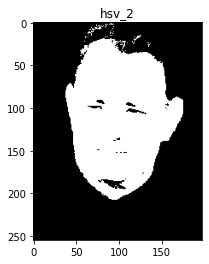

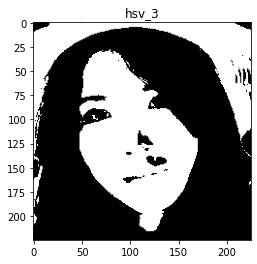

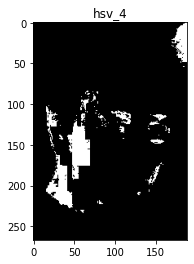

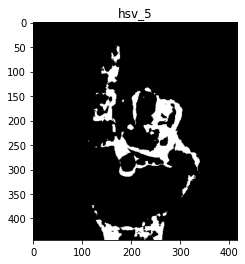

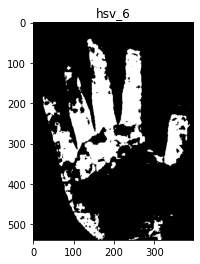

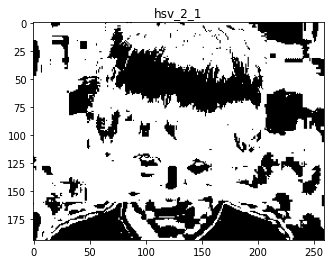

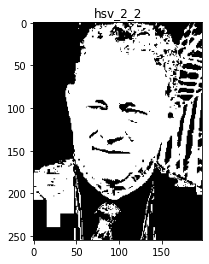

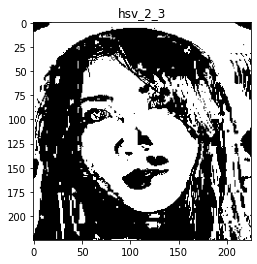

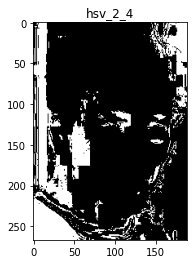

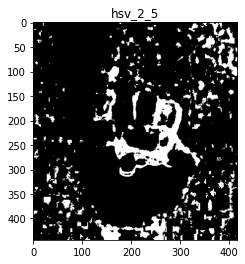

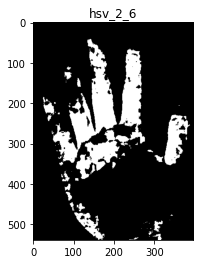

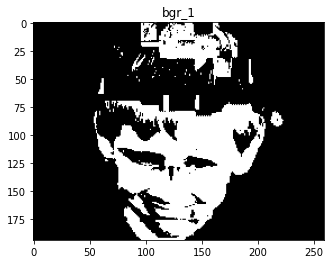

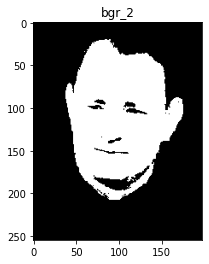

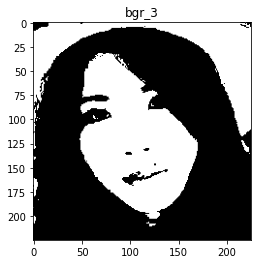

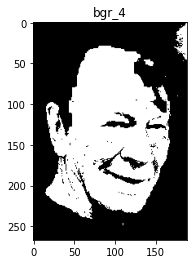

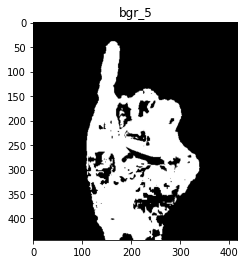

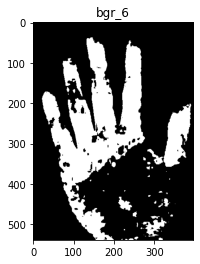

In [ ]:
import os

# Name and path of the images to load:
image_names = ['test1.jpg', 'test2.jpg', 'test3.jpg', 'test4.jpg', 'test5.jpg', 'test6.jpg']
folder_path = '../Dongkeun-OpenCV-ImgData/skin_test_imgs'

# Load all test images building the relative path using 'os.path.join'
def load_all_test_images():
    """Loads all the test images and returns the created array containing the loaded images"""

    skin_images = []
    for index_image, name_image in enumerate(image_names):
        # Build the relative path where the current image is:
        image_path = os.path.join(folder_path, name_image)
        # print("image_path: '{}'".format(image_path))
        # Read the image and add it (append) to the structure 'skin_images'
        skin_images.append(cv2.imread(image_path))
    # Return all the loaded test images:
    return skin_images


# Show all the images of the array creating the name for each one
def show_images(array_img, title):
    """Shows all the images contained in the array"""

    for index_image, image in enumerate(array_img):
        show_with_matplotlib(image, title + "_" + str(index_image + 1))

# We load all the test images:
test_images = load_all_test_images()

# We plot the test images:
show_images(test_images, "test img")

# Lower and upper boundaries for the HSV skin segmentation method:
lower_hsv = np.array([0, 48, 80], dtype="uint8")
upper_hsv = np.array([20, 255, 255], dtype="uint8")


# Skin detector based on the HSV color space
def skin_detector_hsv(bgr_image):
    """Skin segmentation algorithm based on the HSV color space"""

    # Convert image from BGR to HSV color space:
    hsv_image = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2HSV)

    # Find region with skin tone in HSV image:
    skin_region = cv2.inRange(hsv_image, lower_hsv, upper_hsv)
    return skin_region


# Lower and upper boundaries for the HSV skin segmentation method:
lower_hsv_2 = np.array([0, 50, 0], dtype="uint8")
upper_hsv_2 = np.array([120, 150, 255], dtype="uint8")


# Skin detector based on the HSV color space
def skin_detector_hsv_2(bgr_image):
    """Skin segmentation algorithm based on the HSV color space"""

    # Convert image from BGR to HSV color space:
    hsv_image = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2HSV)

    # Find region with skin tone in HSV image:
    skin_region = cv2.inRange(hsv_image, lower_hsv_2, upper_hsv_2)
    return skin_region


# Lower and upper boundaries for the YCrCb skin segmentation method:
# Values taken for the publication: 'Face Segmentation Using Skin-Color Map in Videophone Applications'
# The same values appear in the publication 'Skin segmentation using multiple thresholding'
# (Cb in [77, 127]) and (Cr in [133, 173])
lower_ycrcb = np.array([0, 133, 77], dtype="uint8")
upper_ycrcb = np.array([255, 173, 127], dtype="uint8")


# Skin detector based on the YCrCb color space
def skin_detector_ycrcb(bgr_image):
    """Skin segmentation algorithm based on the YCrCb color space.
    See 'Face Segmentation Using Skin-Color Map in Videophone Applications'"""

    # Convert image from BGR to YCrCb color space:
    ycrcb_image = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2YCR_CB)

    # Find region with skin tone in YCrCb image
    skin_region = cv2.inRange(ycrcb_image, lower_ycrcb, upper_ycrcb)
    return skin_region


# Values are taken from: 'RGB-H-CbCr Skin Colour Model for Human Face Detection'
# (R > 95) AND (G > 40) AND (B > 20) AND (max{R, G, B} − min{R, G, B} > 15) AND (|R − G| > 15) AND (R > G) AND (R > B)
# (R > 220) AND (G > 210) AND (B > 170) AND (|R − G| ≤ 15) AND (R > B) AND (G > B)
def bgr_skin(b, g, r):
    """Rule for skin pixel segmentation based on the paper 'RGB-H-CbCr Skin Colour Model for Human Face Detection'"""

    e1 = bool((r > 95) and (g > 40) and (b > 20) and ((max(r, max(g, b)) - min(r, min(g, b))) > 15) and (
            abs(int(r) - int(g)) > 15) and (r > g) and (r > b))
    e2 = bool((r > 220) and (g > 210) and (b > 170) and (abs(int(r) - int(g)) <= 15) and (r > b) and (g > b))
    return e1 or e2


# Skin detector based on the BGR color space
def skin_detector_bgr(bgr_image):
    """Skin segmentation based on the RGB color space"""

    h = bgr_image.shape[0]
    w = bgr_image.shape[1]

    # We crete the result image with back background
    res = np.zeros((h, w, 1), dtype="uint8")

    # Only 'skin pixels' will be set to white (255) in the res image:
    for y in range(0, h):
        for x in range(0, w):
            (b, g, r) = bgr_image[y, x]
            if bgr_skin(b, g, r):
                res[y, x] = 255

    return res


# Implemented skin detectors to be used:
skin_detectors = {
    'ycrcb': skin_detector_ycrcb,
    'hsv': skin_detector_hsv,
    'hsv_2': skin_detector_hsv_2,
    'bgr': skin_detector_bgr
}


# Apply the 'skin_detector' to all the images in the array
def apply_skin_detector(array_img, skin_detector):
    """Applies the specific 'skin_detector' to all the images in the array"""

    skin_detector_result = []
    for index_image, image in enumerate(array_img):
        detected_skin = skin_detectors[skin_detector](image)
        bgr = cv2.cvtColor(detected_skin, cv2.COLOR_GRAY2BGR)
        skin_detector_result.append(bgr)
    return skin_detector_result


# For each skin detector we apply and show all the test images:
show_images(apply_skin_detector(test_images, 'ycrcb'), "ycrcb")
show_images(apply_skin_detector(test_images, 'hsv'), "hsv")
show_images(apply_skin_detector(test_images, 'hsv_2'), "hsv_2")
show_images(apply_skin_detector(test_images, 'bgr'), "bgr")

### Color maps in OpenCv
Source Code: color_map_example.py

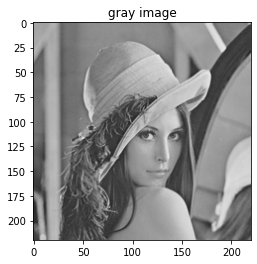

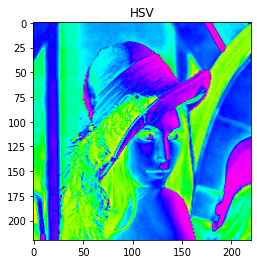

In [ ]:
# We load the image using cv2.imread() and using 'cv2.IMREAD_GRAYSCALE' argument:
gray_img = cv2.imread('../Dongkeun-OpenCV-ImgData/lenna.png', cv2.IMREAD_GRAYSCALE)

# We apply the color map 'cv2.COLORMAP_HSV'
img_COLORMAP_HSV = cv2.applyColorMap(gray_img, cv2.COLORMAP_HSV)

# Add the subplot:
show_with_matplotlib(cv2.cvtColor(gray_img, cv2.COLOR_GRAY2BGR), "gray image")
show_with_matplotlib(img_COLORMAP_HSV, "HSV")

Source Code: color_map_all.py

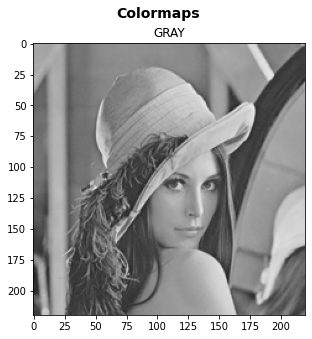

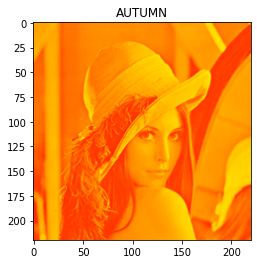

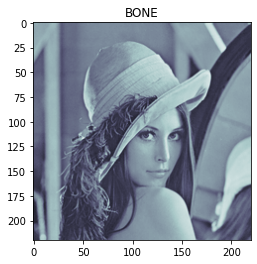

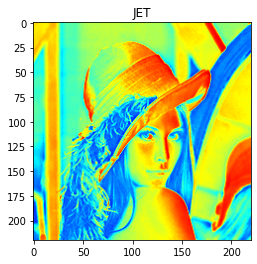

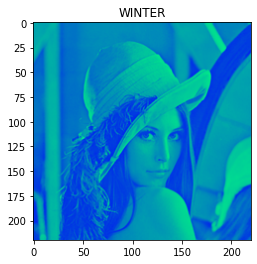

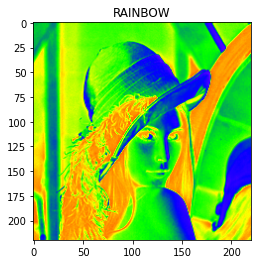

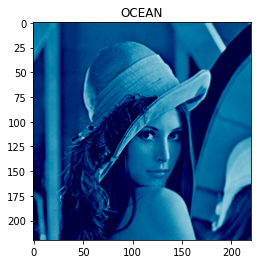

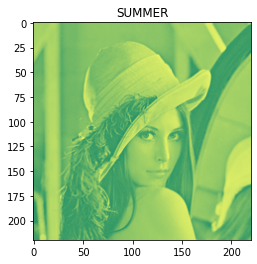

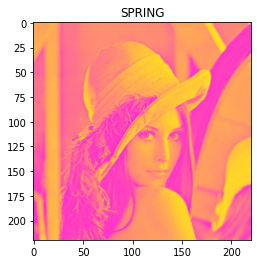

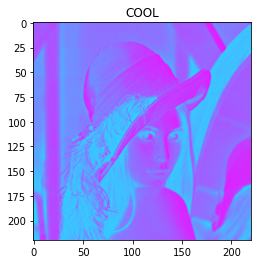

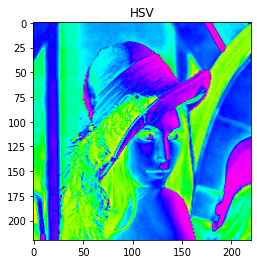

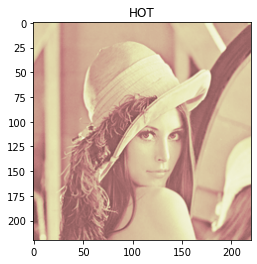

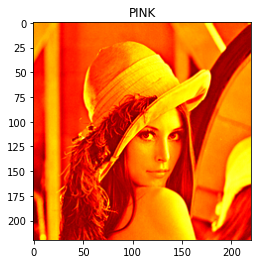

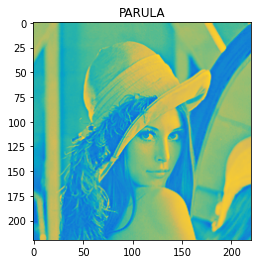

In [ ]:
# We load the image using cv2.imread() and using 'cv2.IMREAD_GRAYSCALE' argument:
gray_img = cv2.imread('../Dongkeun-OpenCV-ImgData/lenna.png', cv2.IMREAD_GRAYSCALE)

# We define all the color map names to be used later:
colormaps = ["AUTUMN", "BONE", "JET", "WINTER", "RAINBOW", "OCEAN", "SUMMER", "SPRING", "COOL", "HSV", "HOT", "PINK",
             "PARULA"]

# We create a figure() object with appropriate size and title
plt.figure(figsize=(12, 5))
plt.suptitle("Colormaps", fontsize=14, fontweight='bold')

# First, we add the grayscale image to the Figure:
# Note that we convert ir to BGR for simplicity and make use of the function 'show_with_matplotlib'
# The function 'show_with_matplotlib' receives a BGR image:
show_with_matplotlib(cv2.cvtColor(gray_img, cv2.COLOR_GRAY2BGR), "GRAY")

# Now we iterate to apply all the colormaps and add the Figure:
for idx, val in enumerate(colormaps):
    # print("idx: {}, val: {}".format(idx, val))
    show_with_matplotlib(cv2.applyColorMap(gray_img, idx), val)

#### Customizing Color Map 1
Source Code: color_map_custom_values.py

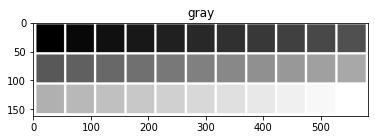

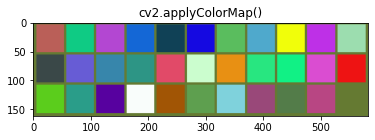

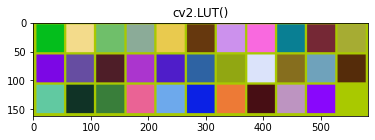

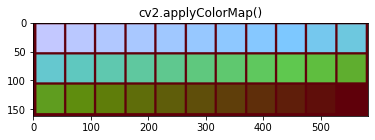

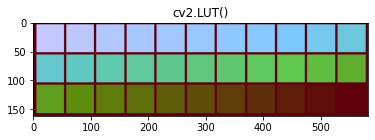

In [ ]:
def apply_custom_colormap_values(im_gray):
    """Applies a custom color map using cv2.applyColorMap()"""

    # Create the LUT:
    lut = np.zeros((256, 1, 3), dtype=np.uint8)
    lut[:, 0, 0] = [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
                    255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
                    255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
                    255, 255, 255, 255, 255, 253, 251, 249, 247, 245, 242, 241, 238, 237, 235, 233, 231, 229, 227, 225,
                    223, 221, 219, 217, 215, 213, 211, 209, 207, 205, 203, 201, 199, 197, 195, 193, 191, 189, 187, 185,
                    183, 181, 179, 177, 175, 173, 171, 169, 167, 165, 163, 161, 159, 157, 155, 153, 151, 149, 147, 145,
                    143, 141, 138, 136, 134, 132, 131, 129, 126, 125, 122, 121, 118, 116, 115, 113, 111, 109, 107, 105,
                    102, 100, 98, 97, 94, 93, 91, 89, 87, 84, 83, 81, 79, 77, 75, 73, 70, 68, 66, 64, 63, 61, 59, 57,
                    54, 52, 51, 49, 47, 44, 42, 40, 39, 37, 34, 33, 31, 29, 27, 25, 22, 20, 18, 17, 14, 13, 11, 9, 6, 4,
                    2, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
                    10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
                    10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]

    lut[:, 0, 1] = [200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200,
                    200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200,
                    200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200,
                    200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200,
                    200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200,
                    200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200,
                    200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200,
                    200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 198, 196, 194, 192,
                    190, 188, 186, 184, 182, 180, 178, 176, 174, 171, 169, 167, 165, 163, 161, 159, 157, 155, 153, 151,
                    149, 147, 145, 143, 141, 139, 137, 135, 133, 131, 129, 127, 125, 123, 121, 119, 117, 115, 113, 111,
                    109, 107, 105, 103, 101, 99, 97, 95, 93, 91, 89, 87, 85, 83, 82, 80, 78, 76, 74, 72, 70, 68, 66, 64,
                    62, 60, 58, 56, 54, 52, 50, 48, 46, 44, 42, 40, 38, 36, 34, 32, 30, 28, 26, 24, 22, 20, 18, 16, 14,
                    12, 10, 8, 6, 4, 2, 0]

    lut[:, 0, 2] = [195, 194, 193, 191, 190, 189, 188, 187, 186, 185, 184, 183, 182, 181, 179, 178, 177, 176, 175, 174,
                    173, 172, 171, 170, 169, 167, 166, 165, 164, 163, 162, 161, 160, 159, 158, 157, 155, 154, 153, 152,
                    151, 150, 149, 148, 147, 146, 145, 143, 142, 141, 140, 139, 138, 137, 136, 135, 134, 133, 131, 130,
                    129, 128, 127, 126, 125, 124, 123, 122, 121, 120, 119, 118, 117, 116, 115, 114, 113, 112, 111, 110,
                    109, 108, 107, 106, 105, 104, 103, 102, 101, 95, 99, 98, 97, 96, 95, 95, 95, 95, 95, 95, 95, 95, 95,
                    95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95,
                    95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95,
                    95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95,
                    95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95,
                    95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95,
                    95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95,
                    95, 95, 95]

    # Apply color map using cv2.applyColorMap()
    im_color = cv2.applyColorMap(im_gray, lut)
    return im_color


def apply_custom_colormap_values2(im_gray):
    """Applies a custom color map using cv2.LUT()"""

    # Create the LUT:
    lut = np.zeros((256, 3), dtype=np.uint8)
    lut[:, 0] = [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
                 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
                 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
                 255, 255, 255, 255, 255, 253, 251, 249, 247, 245, 242, 241, 238, 237, 235, 233, 231, 229, 227, 225,
                 223, 221, 219, 217, 215, 213, 211, 209, 207, 205, 203, 201, 199, 197, 195, 193, 191, 189, 187, 185,
                 183, 181, 179, 177, 175, 173, 171, 169, 167, 165, 163, 161, 159, 157, 155, 153, 151, 149, 147, 145,
                 143, 141, 138, 136, 134, 132, 131, 129, 126, 125, 122, 121, 118, 116, 115, 113, 111, 109, 107, 105,
                 102, 100, 98, 97, 94, 93, 91, 89, 87, 84, 83, 81, 79, 77, 75, 73, 70, 68, 66, 64, 63, 61, 59, 57,
                 54, 52, 51, 49, 47, 44, 42, 40, 39, 37, 34, 33, 31, 29, 27, 25, 22, 20, 18, 17, 14, 13, 11, 9, 6, 4,
                 2, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
                 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
                 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]

    lut[:, 1] = [200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200,
                 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200,
                 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200,
                 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200,
                 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200,
                 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200,
                 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200,
                 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 198, 196, 194, 192,
                 190, 188, 186, 184, 182, 180, 178, 176, 174, 171, 169, 167, 165, 163, 161, 159, 157, 155, 153, 151,
                 149, 147, 145, 143, 141, 139, 137, 135, 133, 131, 129, 127, 125, 123, 121, 119, 117, 115, 113, 111,
                 109, 107, 105, 103, 101, 99, 97, 95, 93, 91, 89, 87, 85, 83, 82, 80, 78, 76, 74, 72, 70, 68, 66, 64,
                 62, 60, 58, 56, 54, 52, 50, 48, 46, 44, 42, 40, 38, 36, 34, 32, 30, 28, 26, 24, 22, 20, 18, 16, 14,
                 12, 10, 8, 6, 4, 2, 0]

    lut[:, 2] = [195, 194, 193, 191, 190, 189, 188, 187, 186, 185, 184, 183, 182, 181, 179, 178, 177, 176, 175, 174,
                 173, 172, 171, 170, 169, 167, 166, 165, 164, 163, 162, 161, 160, 159, 158, 157, 155, 154, 153, 152,
                 151, 150, 149, 148, 147, 146, 145, 143, 142, 141, 140, 139, 138, 137, 136, 135, 134, 133, 131, 130,
                 129, 128, 127, 126, 125, 124, 123, 122, 121, 120, 119, 118, 117, 116, 115, 114, 113, 112, 111, 110,
                 109, 108, 107, 106, 105, 104, 103, 102, 101, 95, 99, 98, 97, 96, 95, 95, 95, 95, 95, 95, 95, 95, 95,
                 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95,
                 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95,
                 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95,
                 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95,
                 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95,
                 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95,
                 95, 95, 95]

    # Apply color map using cv2.LUT():
    s0, s1 = im_gray.shape
    im_color = np.empty(shape=(s0, s1, 3), dtype=np.uint8)

    for i in range(3):
        im_color[..., i] = cv2.LUT(im_gray, lut[:, i])
    return im_color


def apply_rand_custom_colormap_values(im_gray):
    """Applies a random color map using cv2.applyColorMap()"""

    # Create random LUT
    lut = np.random.randint(255, size=(256, 1, 3), dtype=np.uint8)

    # Apply color map using cv2.applyColorMap()
    im_color = cv2.applyColorMap(im_gray, lut)
    return im_color


def apply_rand_custom_colormap_values2(im_gray):
    """Applies a random color map using cv2.LUT()"""

    # Create random LUT
    lut = np.random.randint(255, size=(256, 3), dtype=np.uint8)

    # Apply color map using cv2.LUT():
    s0, s1 = im_gray.shape
    im_color = np.empty(shape=(s0, s1, 3), dtype=np.uint8)
    for i in range(3):
        im_color[..., i] = cv2.LUT(im_gray, lut[:, i])
    return im_color


# We load the image using cv2.imread() and using 'cv2.IMREAD_GRAYSCALE' argument:
gray_img = cv2.imread('../Dongkeun-OpenCV-ImgData/shades.png', cv2.IMREAD_GRAYSCALE)

# Show image:
show_with_matplotlib(cv2.cvtColor(gray_img, cv2.COLOR_GRAY2BGR), "gray")

# Apply the custom color maps to the grayscale image:
custom_rand_1 = apply_rand_custom_colormap_values(gray_img)
custom_rand_2 = apply_rand_custom_colormap_values2(gray_img)
custom_values_1 = apply_custom_colormap_values(gray_img)
custom_values_2 = apply_custom_colormap_values2(gray_img)

# Display all the resulting images:
show_with_matplotlib(custom_rand_1, "cv2.applyColorMap()")
show_with_matplotlib(custom_rand_2, "cv2.LUT()")
show_with_matplotlib(custom_values_1, "cv2.applyColorMap()")
show_with_matplotlib(custom_values_2, "cv2.LUT()")


### Customized Color map for second approach
Source Code: color_map_custom_key_colors.py


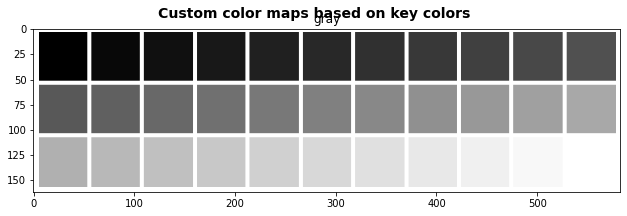

----------
((0, (255, 0, 255)), (0.25, (255, 0, 180)), (0.5, (255, 0, 120)), (0.75, (255, 0, 60)), (1.0, (255, 0, 0)))
-----
blue : np.linspace('255', '255', '64' - '0' = '64')
green : np.linspace('0', '0', '64' - '0' = '64')
red : np.linspace('255', '180', '64' - '0' = '64')
blue : np.linspace('255', '255', '128' - '64' = '64')
green : np.linspace('0', '0', '128' - '64' = '64')
red : np.linspace('180', '120', '128' - '64' = '64')
blue : np.linspace('255', '255', '192' - '128' = '64')
green : np.linspace('0', '0', '192' - '128' = '64')
red : np.linspace('120', '60', '192' - '128' = '64')
blue : np.linspace('255', '255', '256' - '192' = '64')
green : np.linspace('0', '0', '256' - '192' = '64')
red : np.linspace('60', '0', '256' - '192' = '64')
----------
((0, (0, 255, 128)), (0.25, (128, 184, 64)), (0.5, (255, 128, 0)), (0.75, (64, 128, 224)), (1.0, (0, 128, 255)))
-----
blue : np.linspace('0', '128', '64' - '0' = '64')
green : np.linspace('255', '184', '64' - '0' = '64')
red : np.linsp

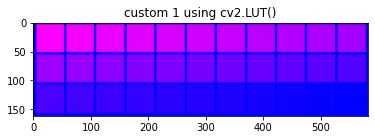

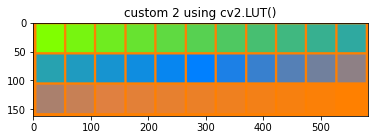

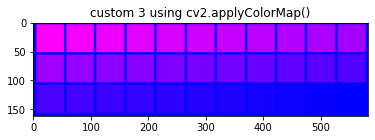

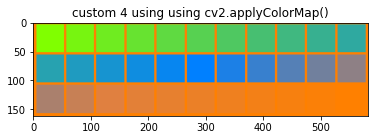

In [ ]:
dict_color = {0: "blue", 1: "green", 2: "red"}


def build_lut(cmap):
    """Builds look up table based on 'key colors' using np.linspace()"""

    lut = np.empty(shape=(256, 3), dtype=np.uint8)
    # Show for debugging purposes:
    print("----------")
    print(cmap)
    print("-----")

    max = 256
    # build lookup table:
    lastval, lastcol = cmap[0]
    for step, col in cmap[1:]:
        val = int(step * max)
        for i in range(3):
            print("{} : np.linspace('{}', '{}', '{}' - '{}' = '{}')".format(dict_color[i], lastcol[i], col[i], val,
                                                                            lastval, val - lastval))
            lut[lastval:val, i] = np.linspace(lastcol[i], col[i], val - lastval)

        lastcol = col
        lastval = val

    return lut


def apply_color_map_1(gray, cmap):
    """Applies a custom color map using cv2.LUT()"""

    lut = build_lut(cmap)
    s0, s1 = gray.shape
    out = np.empty(shape=(s0, s1, 3), dtype=np.uint8)

    for i in range(3):
        out[..., i] = cv2.LUT(gray, lut[:, i])
    return out


def apply_color_map_2(gray, cmap):
    """Applies a custom color map using cv2.applyColorMap()"""

    lut = build_lut(cmap)
    lut_reshape = np.reshape(lut, (256, 1, 3))
    im_color = cv2.applyColorMap(gray, lut_reshape)
    return im_color


# Read grayscale image:
gray_img = cv2.imread('../Dongkeun-OpenCV-ImgData/shades.png', cv2.IMREAD_GRAYSCALE)

# Create the dimensions of the figure and set title:
plt.figure(figsize=(14, 3))
plt.suptitle("Custom color maps based on key colors", fontsize=14, fontweight='bold')

# Show gray image:
show_with_matplotlib(cv2.cvtColor(gray_img, cv2.COLOR_GRAY2BGR), "gray")

# Apply the custom color map - (b,g,r) values:
custom_1 = apply_color_map_1(gray_img, ((0, (255, 0, 255)), (0.25, (255, 0, 180)), (0.5, (255, 0, 120)),
                                        (0.75, (255, 0, 60)), (1.0, (255, 0, 0))))

custom_2 = apply_color_map_1(gray_img, ((0, (0, 255, 128)), (0.25, (128, 184, 64)), (0.5, (255, 128, 0)),
                                        (0.75, (64, 128, 224)), (1.0, (0, 128, 255))))

custom_3 = apply_color_map_2(gray_img, ((0, (255, 0, 255)), (0.25, (255, 0, 180)), (0.5, (255, 0, 120)),
                                        (0.75, (255, 0, 60)), (1.0, (255, 0, 0))))

custom_4 = apply_color_map_2(gray_img, ((0, (0, 255, 128)), (0.25, (128, 184, 64)), (0.5, (255, 128, 0)),
                                        (0.75, (64, 128, 224)), (1.0, (0, 128, 255))))

# Display all the resulting images:
show_with_matplotlib(custom_1, "custom 1 using cv2.LUT()")
show_with_matplotlib(custom_2, "custom 2 using cv2.LUT()")
show_with_matplotlib(custom_3, "custom 3 using cv2.applyColorMap()")
show_with_matplotlib(custom_4, "custom 4 using using cv2.applyColorMap()")

### Color Map Legend
Source Code: color_map_custom_legend.py

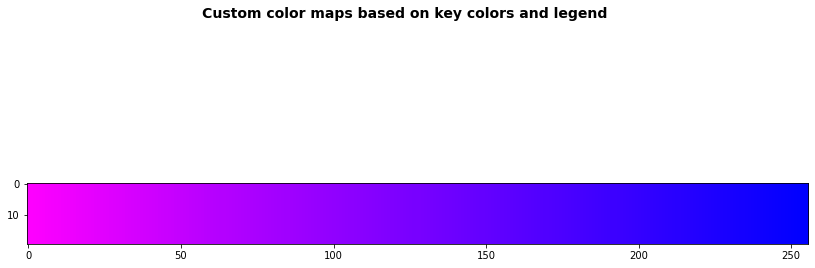

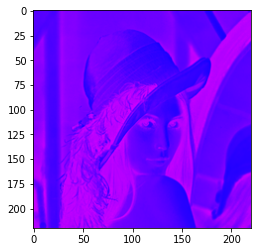

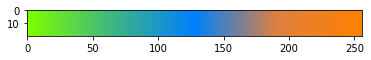

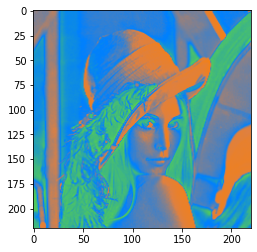

In [ ]:
def build_lut_image(cmap, height):
    """Builds the legend image"""

    lut = build_lut(cmap)
    image = np.repeat(lut[np.newaxis, ...], height, axis=0)

    return image


def build_lut(cmap):
    """Builds look up table based on 'key colors' using np.linspace()"""

    lut = np.empty(shape=(256, 3), dtype=np.uint8)
    max = 256
    # build lookup table:
    lastval, lastcol = cmap[0]
    for step, col in cmap[1:]:
        val = int(step * max)
        for i in range(3):
            lut[lastval:val, i] = np.linspace(lastcol[i], col[i], val - lastval)

        lastcol = col
        lastval = val

    return lut


def apply_color_map_1(gray, cmap):
    """Applies a custom color map using cv2.LUT()"""

    lut = build_lut(cmap)
    s0, s1 = gray.shape
    out = np.empty(shape=(s0, s1, 3), dtype=np.uint8)

    for i in range(3):
        out[..., i] = cv2.LUT(gray, lut[:, i])
    return out


def apply_color_map_2(gray, cmap):
    """Applies a custom color map using cv2.applyColorMap()"""

    lut = build_lut(cmap)
    lut2 = np.reshape(lut, (256, 1, 3))
    im_color = cv2.applyColorMap(gray, lut2)
    return im_color


# Read grayscale image:
gray_img = cv2.imread('../Dongkeun-OpenCV-ImgData/lenna.png', cv2.IMREAD_GRAYSCALE)

# Create the dimensions of the figure and set title:
plt.figure(figsize=(14, 6))
plt.suptitle("Custom color maps based on key colors and legend", fontsize=14, fontweight='bold')

# Build the color maps (b,g,r) values:
custom_1 = apply_color_map_1(gray_img, ((0, (255, 0, 255)), (0.25, (255, 0, 180)), (0.5, (255, 0, 120)),
                                        (0.75, (255, 0, 60)), (1.0, (255, 0, 0))))

custom_2 = apply_color_map_2(gray_img, ((0, (0, 255, 128)), (0.25, (128, 184, 64)), (0.5, (255, 128, 0)),
                                        (0.75, (64, 128, 224)), (1.0, (0, 128, 255))))

# Build the legend images:
legend_1 = build_lut_image(((0, (255, 0, 255)), (0.25, (255, 0, 180)), (0.5, (255, 0, 120)),
                            (0.75, (255, 0, 60)), (1.0, (255, 0, 0))), 20)

legend_2 = build_lut_image(((0, (0, 255, 128)), (0.25, (128, 184, 64)), (0.5, (255, 128, 0)),
                            (0.75, (64, 128, 224)), (1.0, (0, 128, 255))), 20)

# Display all the resulting images:
show_with_matplotlib(legend_1, "")
show_with_matplotlib(custom_1, "")
show_with_matplotlib(legend_2, "")
show_with_matplotlib(custom_2, "")